In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [2]:
diamonds_data = pd.read_csv("../input_diamonds/diamonds_train.csv")
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [3]:
diamonds_data.drop(columns="Unnamed: 0",inplace=True ,axis=1)

In [4]:
diamonds_data.info() #there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


**Convert Categorial columns to numeric:**

In [5]:
cut_list=list(diamonds_data.cut.unique())
cut_list

['Ideal', 'Very Good', 'Premium', 'Good', 'Fair']

In [6]:
diamonds_data["cut"]=pd.Categorical(diamonds_data["cut"],ordered=True,categories=cut_list)
diamonds_data["cut"]=diamonds_data["cut"].cat.codes
diamonds_data["cut"].value_counts()

0    16090
2    10339
1     9036
3     3694
4     1186
Name: cut, dtype: int64

In [7]:
color_list=list(diamonds_data.color.unique())
color_list

['H', 'D', 'F', 'G', 'I', 'E', 'J']

In [8]:
diamonds_data["color"]=pd.Categorical(diamonds_data["color"],ordered=True,categories=color_list)
diamonds_data["color"]=diamonds_data["color"].cat.codes
diamonds_data["color"].value_counts()

3    8499
5    7351
2    7130
0    6234
1    5074
4    4023
6    2034
Name: color, dtype: int64

In [9]:
clarity_list=list(diamonds_data.clarity.unique())
clarity_list

['VS2', 'VVS2', 'VS1', 'IF', 'SI1', 'SI2', 'VVS1', 'I1']

In [10]:
diamonds_data["clarity"]=pd.Categorical(diamonds_data["clarity"],ordered=True,categories=clarity_list)
diamonds_data["clarity"]=diamonds_data["clarity"].cat.codes
diamonds_data["clarity"].value_counts()

4    9751
0    9178
5    6828
2    6101
1    3858
6    2714
3    1362
7     553
Name: clarity, dtype: int64

In [11]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,0,0,0,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,1,1,1,64.0,56.0,4.14,4.17,2.66,532
2,0.42,2,2,2,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,0,0,3,61.1,57.0,4.16,4.12,2.53,600
4,1.10,3,3,4,63.4,57.0,6.52,6.55,4.14,4997


**Try to find outliers:**

In [12]:
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,1.128764,2.723559,2.811873,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.126648,1.810074,2.071042,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,1.000000,3.000000,3.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,2.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


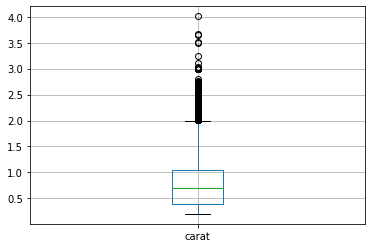

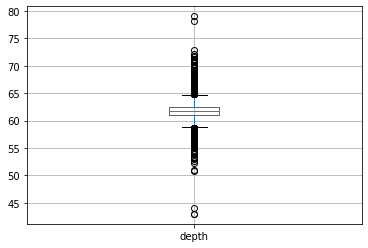

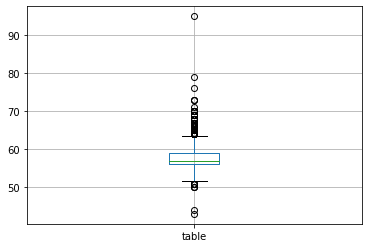

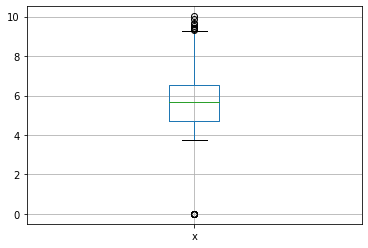

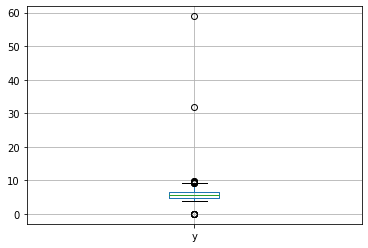

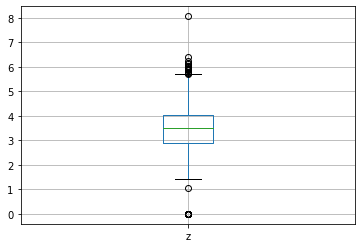

In [13]:
diamonds_data.boxplot(column="carat")
plt.figure()
diamonds_data.boxplot(column="depth")
plt.figure()
diamonds_data.boxplot(column="table")
plt.figure()
diamonds_data.boxplot(column="x")
plt.figure()
diamonds_data.boxplot(column="y")
plt.figure()
diamonds_data.boxplot(column="z")

**Correlation between columns:**

In [14]:
corr = diamonds_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.174036,0.024406,0.149057,0.029414,0.181273,0.975077,0.944445,0.967289,0.921887
cut,0.174036,1.000000,-0.002284,0.093984,0.130844,0.515943,0.170337,0.153217,0.178058,0.087908
color,0.024406,-0.002284,1.000000,-0.042186,-0.008182,0.012969,0.017645,0.017463,0.017787,0.000333
clarity,0.149057,0.093984,-0.042186,1.000000,0.040889,0.055111,0.145018,0.139297,0.146497,0.031436
depth,0.029414,0.130844,-0.008182,0.040889,1.000000,-0.288987,-0.023389,-0.027880,0.097399,-0.009228
table,0.181273,0.515943,0.012969,0.055111,-0.288987,1.000000,0.193986,0.180449,0.153175,0.127338
x,0.975077,0.170337,0.017645,0.145018,-0.023389,0.193986,1.000000,0.966827,0.985080,0.883163
y,0.944445,0.153217,0.017463,0.139297,-0.027880,0.180449,0.966827,1.000000,0.959957,0.857564
z,0.967289,0.178058,0.017787,0.146497,0.097399,0.153175,0.985080,0.959957,1.000000,0.872855
price,0.921887,0.087908,0.000333,0.031436,-0.009228,0.127338,0.883163,0.857564,0.872855,1.000000


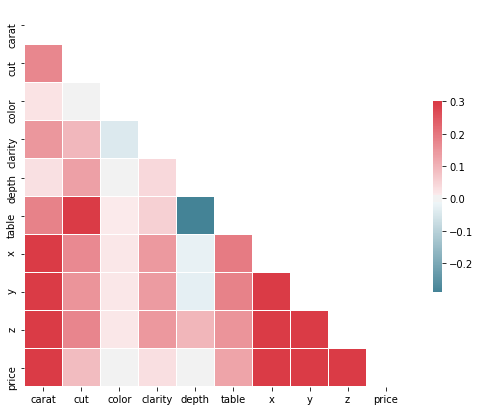

In [15]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
diamonds_data.drop(columns=['y','x','z'],inplace=True) # high correlation with carat colum

In [17]:
diamonds_data.to_csv("diamonds_data.csv")

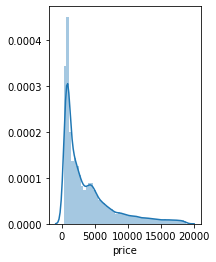

In [18]:
plt.subplot(1,2,1)
sns.distplot(diamonds_data['price'])

In [19]:
diamonds_data['price'].value_counts()

625      99
789      96
605      95
776      94
596      93
         ..
12112     1
16210     1
4040      1
18369     1
16560     1
Name: price, Length: 10386, dtype: int64

## Standardization:

In [20]:
scalar_features = diamonds_data.drop(columns="price")
gt = diamonds_data["price"]
scaler = StandardScaler()
scaler.fit(scalar_features, gt)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
transformed_scalar_features = scaler.transform(scalar_features)
diamonds_scaler = pd.DataFrame(transformed_scalar_features,columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table'])
diamonds_scaler.head()

,carat,cut,color,clarity,depth,table
0,0.880093,-1.001891,-1.504686,-1.357726,0.877395,-0.205924
1,-1.095267,-0.114291,-0.952215,-0.874871,1.579543,-0.653290
2,-0.797901,0.773309,-0.399745,-0.392016,-0.386471,0.241442
3,-1.137748,-1.001891,-1.504686,0.090838,-0.456686,-0.205924
4,0.646448,1.660908,0.152725,0.573693,1.158254,-0.205924


## Train:

In [22]:
X=diamonds_scaler
y=diamonds_data["price"]
display(X.head(),y.head())

,carat,cut,color,clarity,depth,table
0,0.880093,-1.001891,-1.504686,-1.357726,0.877395,-0.205924
1,-1.095267,-0.114291,-0.952215,-0.874871,1.579543,-0.653290
2,-0.797901,0.773309,-0.399745,-0.392016,-0.386471,0.241442
3,-1.137748,-1.001891,-1.504686,0.090838,-0.456686,-0.205924
4,0.646448,1.660908,0.152725,0.573693,1.158254,-0.205924


0    6134
1     532
2    1103
3     600
4    4997
Name: price, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 6) (8069, 6) (32276,) (8069,)


## Trying Models:

In [24]:
models = {
    #"randomforestregressor1": RandomForestRegressor(n_estimators=100),#0.9772181
    #"randomforestregressor2": RandomForestRegressor(n_estimators=200),#0.9773515
    #"randomforestregressor2": RandomForestRegressor(n_estimators=250),#0.9773515
    "randomforestregressor3": RandomForestRegressor(n_estimators=500),#0.977704110471639
    #"boosting":GradientBoostingRegressor(),#0.96013185
    #"neigbor":KNeighborsRegressor(),#0.927466
    #"tree":tree.DecisionTreeClassifier()#0.8972199
}

# Train all the models in the models dict
for name,model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3, n_jobs=2)))

Training randomforestregressor3...
0.9778040261539228


In [25]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df.head()

,randomforestregressor3,gt
0,450.020000,480
1,4127.287167,3898
2,840.576579,653
3,969.277000,1299
4,4799.595300,5704


In [26]:
for modelName, model in models.items():    
    print(f"Evaluating model [{modelName}]:")
    print("r2_score", r2_score(df["gt"],df[modelName]))
    print("RSME", (mean_squared_error(df["gt"],df[modelName])**0.5))

Evaluating model [randomforestregressor3]:
r2_score 0.9771310388195917
RSME 602.0133156196512


## Random Forest:

In [27]:
# Trying Parameters:
n_estimators = [500, 1000, 1500]
min_samples_split = range(10, 100, 20)
min_samples_leaf = range(10, 100, 20)
for n in n_estimators:
      forest = RandomForestRegressor(n_estimators=n, n_jobs=-1, warm_start=True)
      print(f"number of trees: {n}")
      forest.fit(X_train, y_train)
      prediction = forest.predict(X_test)
      print("r2_score", r2_score(y_test,prediction))
      print("RSME", mean_squared_error(y_test,prediction))

number of trees: 500
r2_score 0.9771266838186302
RSME 362489.04885518464
number of trees: 1000
r2_score 0.9771070218753651
RSME 362800.6450861943
number of trees: 1500
r2_score 0.9771799725785382
RSME 361644.54551598686


In [48]:
chosen_forest = RandomForestRegressor(1500, n_jobs=-1).fit(X_train, y_train)
forest_prediction = chosen_forest.predict(X_test)
print(r2_score(y_test, forest_prediction))
print((mean_squared_error(y_test, forest_prediction))**0.5) 

0.97719745169156
601.1385381800678


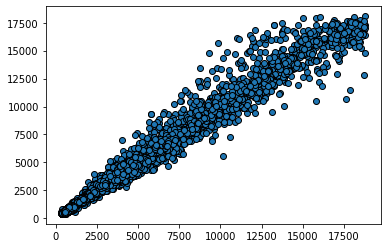

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test, forest_prediction, edgecolors=(0, 0, 0))

## Testing:

In [29]:
diamonds_test = pd.read_csv("../input_diamonds/diamonds_test.csv")
diamonds_test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [35]:
diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13449 entries, 0 to 13448
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13449 non-null  int64  
 1   carat       13449 non-null  float64
 2   cut         13449 non-null  int8   
 3   color       13449 non-null  int8   
 4   clarity     13449 non-null  int8   
 5   depth       13449 non-null  float64
 6   table       13449 non-null  float64
dtypes: float64(3), int64(1), int8(3)
memory usage: 459.8 KB


In [30]:
diamonds_test.drop(columns=['y','x','z'],inplace=True)

In [31]:
cols_norm=['carat',"depth","table"]
for c in cols_norm:
    mean=np.mean(diamonds_test[c])
    std=np.std(diamonds_test[c])
    diamonds_test[c]=(diamonds_test[c]-mean)/std

In [49]:
cut_list=list(diamonds_test.cut.unique())
diamonds_test["cut"]=pd.Categorical(diamonds_test["cut"],ordered=True,categories=cut_list)
diamonds_test["cut"]=diamonds_test["cut"].cat.codes
diamonds_test["cut"].value_counts()

0    5398
3    3409
1    3033
2    1197
4     412
Name: cut, dtype: int64

In [33]:
color_list=list(diamonds_test.color.unique())
diamonds_test["color"]=pd.Categorical(diamonds_test["color"],ordered=True,categories=color_list)
diamonds_test["color"]=diamonds_test["color"].cat.codes
diamonds_test["color"].value_counts()

5    2763
3    2425
4    2390
0    2038
1    1681
2    1384
6     768
Name: color, dtype: int64

In [34]:
clarity_list=list(diamonds_test.clarity.unique())
diamonds_test["clarity"]=pd.Categorical(diamonds_test["clarity"],ordered=True,categories=clarity_list)
diamonds_test["clarity"]=diamonds_test["clarity"].cat.codes
diamonds_test["clarity"].value_counts()

4    3281
2    3051
0    2322
5    2055
7    1198
3     933
1     422
6     187
Name: clarity, dtype: int64

In [37]:
diamonds_test.drop(columns="Unnamed: 0",inplace=True)

In [50]:
diamonds_test.head()

,carat,cut,color,clarity,depth,table
0,-1.048154,0,0,0,-1.203383,-0.651290
1,-0.964994,0,1,1,0.248074,-0.202597
2,1.592168,1,2,2,-0.996032,0.246095
3,-1.027364,0,0,2,0.040723,-0.202597
4,1.467429,2,2,3,1.561297,1.143481


In [59]:
price_pred=chosen_forest.predict(diamonds_test)
print(r2_score(y_test, forest_prediction))
print((mean_squared_error(y_test, forest_prediction))**0.5) 

NameError: name 'y_pred' is not defined

In [52]:
df_price=pd.DataFrame({'price':price_pred})
df_price.index.rename('id', inplace=True)
df_price.head()

,price
id,
0,832.527333
1,504.542405
2,4761.811333
3,459.050124
4,4747.959000


In [53]:
df_price.to_csv("./output/test1.csv")